Student Name: Souri
Student Number: 1832728

1. importing libraries

In [108]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn as sk
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

2. Reading dataframes

In [109]:
df1 = pd.read_csv("steps.csv", sep=';')
df1 = df1.fillna(0)
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
df2 = pd.read_csv('survey.csv')
df2

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0


3. removing weight = 700 , height = 0 and remove NaN

In [150]:
df3 = df2[df2["height"]>10]
df3.dropna()
df3

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0


In [151]:
df3 = df3[df3["weight"]<250]
df3 = df3.sort_values(by='weight', ascending=False)
df3

,id,city,gender,age,hh_size,education,education_1,height,weight
549,550,Lille,Male,45-54,1,1,Bachelor,193.0,155.0
820,821,Lille,Female,25-34,3,4,Master or doctorate,160.0,155.0
257,258,Lille,Male,25-34,4,4,Bachelor,183.0,149.0
890,891,Bordeaux,Female,45-54,1,1,Bachelor,167.0,140.0
25,26,Lille,Male,35-44,4,4,High school,185.0,140.0
...,...,...,...,...,...,...,...,...,...
67,68,Lyon,Female,35-44,5,4,Bachelor,150.0,45.0
387,388,Lille,Female,25-34,2,2,Bachelor,158.0,45.0
102,103,Bordeaux,Female,25-34,2,2,Bachelor,157.0,37.0
840,841,Lille,Female,35-44,3,4,High school,158.0,20.0


4. Merging dataframes on a column in both dataframe

In [152]:
df = pd.merge(df1, df3, on='id')
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


5. Removing NaN values from main df and replacing by zero

In [153]:
df = df.fillna(0)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


6. Calculating average steps per user

In [154]:
min_steps=df1.mean(axis = 1, skipna = True)
min_steps.head()

0    5118.273556
1    2817.787234
2    3734.525836
3     220.875380
4     871.914894
dtype: float64

7. visualization a box plot of the average steps of the users

C:\Users\souri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


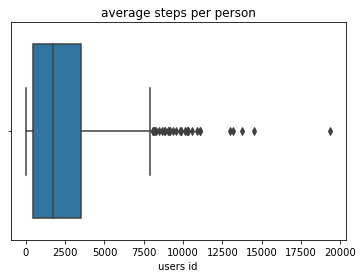

In [187]:
sns.boxplot(min_steps)
plt.title('average steps per person')
plt.xlabel('users id')
plt.show()

Data are not normalized.
skewed to the left.
median about 3200.
while mean is around 6500. 
there is one user active far compared to other users (with average of 20000 steps per day.
50 percent of the user are moderately low active (between 500 to 3500 steps per day)


8. Adding mean as a new column to the dataframe

In [156]:
df = df.merge(min_steps.rename('means'),left_index=True, right_index=True)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,means
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5118.273556
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2817.787234
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3734.525836
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,220.875380
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,871.914894


9. visualizing data for multiple column

C:\Users\souri\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\souri\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\souri\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\souri\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='age', ylabel='means'>

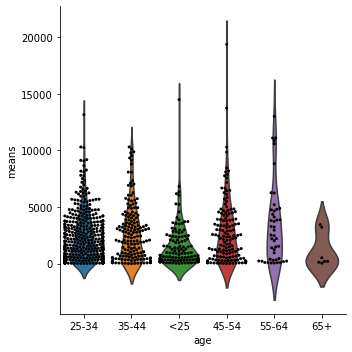

In [157]:
g = sns.catplot(data=dff, x="age", y="means", kind="violin", inner=None)
sns.swarmplot(data=dff, x="age", y="means", color="k", size=3, ax=g.ax)

- those in between 25 to 34 contributes to the most populated group of users.
- user between 35-44 show less tendency to be active in comarison with peple below 34 and above 45 but not less than those above 65.
- although the number of users between 45-54 are considerably lower than those between 25-34 many of them are relatively more active than all other age group.
- people above 65 use of fittness tracker is less than all other ages and their activity rate is also lower compared to thers.

10. Calculating BMI as a indicator of the health and adding it as a new column

In [158]:
BMI= df["weight"]/(df["height"]* df["height"]/10000)
BMI.head()

0    30.930438
1    23.765432
2    25.617284
3    25.249337
4    21.872423
dtype: float64

In [159]:
df = df.merge(BMI.rename('BMI'),left_index=True, right_index=True)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,means,BMI
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5118.273556,30.930438
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2817.787234,23.765432
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3734.525836,25.617284
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,220.875380,25.249337
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,871.914894,21.872423


In [160]:
df = df.sort_values(by='height', ascending=False)
df

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,means,BMI
211,213,0.0,0.0,21427.0,18605.0,8982.0,11590.0,15059.0,8132.0,8035.0,...,Bordeaux,Female,35-44,5,4,Bachelor,195.0,79.0,279.744681,20.775805
38,39,0.0,10375.0,10097.0,9027.0,3507.0,10116.0,15596.0,10151.0,9324.0,...,Lille,Male,45-54,1,2,Master or doctorate,195.0,90.0,3472.395137,23.668639
915,919,0.0,0.0,0.0,0.0,0.0,17240.0,7613.0,20981.0,14548.0,...,Montpellier,Female,<25,2,2,Bachelor,195.0,93.0,5255.422492,24.457594
547,550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Lille,Male,45-54,1,1,Bachelor,193.0,155.0,2212.218845,41.611855
318,321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Lyon,Male,25-34,2,2,Master or doctorate,192.0,99.0,2139.860182,26.855469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Lille,Female,<25,2,3,Bachelor,152.0,96.0,121.990881,41.551247
872,876,0.0,7180.0,10762.0,10057.0,8246.0,11243.0,14157.0,0.0,12744.0,...,Bordeaux,Female,35-44,2,2,High school,151.0,50.0,332.735562,21.928863
904,908,0.0,15122.0,24802.0,11761.0,13190.0,20230.0,20281.0,7309.0,24906.0,...,Lille,Female,45-54,4,4,Bachelor,150.0,72.0,1823.103343,32.000000
66,68,0.0,8806.0,24802.0,12063.0,12871.0,14202.0,23336.0,14949.0,24906.0,...,Lyon,Female,35-44,5,4,Bachelor,150.0,45.0,3385.039514,20.000000


In [148]:
df = df.sort_values(by='weight', ascending=False)
df

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,means,BMI
43,44,0.0,10127.0,3932.0,1623.0,8221.0,0.0,20880.0,7095.0,17533.0,...,Lille,Female,35-44,4,4,Master or doctorate,156.0,700.0,4231.054711,287.639711
548,550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Lille,Male,45-54,1,1,Bachelor,193.0,155.0,2687.486322,41.611855
819,821,0.0,0.0,0.0,3410.0,10224.0,0.0,7613.0,9185.0,10541.0,...,Lille,Female,25-34,3,4,Master or doctorate,160.0,155.0,687.179331,60.546875
257,258,0.0,0.0,0.0,0.0,3790.0,154.0,7137.0,4704.0,13440.0,...,Lille,Male,25-34,4,4,Bachelor,183.0,149.0,1334.492401,44.492221
389,391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Bordeaux,Male,35-44,2,2,High school,165.0,140.0,9178.914894,51.423324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,0.0,0.0,0.0,4176.0,6181.0,2968.0,0.0,13388.0,8409.0,...,Bordeaux,Female,25-34,2,2,Bachelor,157.0,37.0,2357.288754,15.010751
839,841,0.0,13586.0,15098.0,11216.0,20671.0,12447.0,23336.0,11271.0,12773.0,...,Lille,Female,35-44,3,4,High school,158.0,20.0,4570.723404,8.011537
388,390,0.0,7180.0,16149.0,0.0,5121.0,22847.0,2379.0,18059.0,11011.0,...,Lille,Female,25-34,3,4,Vocational,156.0,6.0,1698.927052,2.465483
840,842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Lille,Female,35-44,3,4,Master or doctorate,160.0,0.0,9792.085106,0.000000


11. scatter diagrams

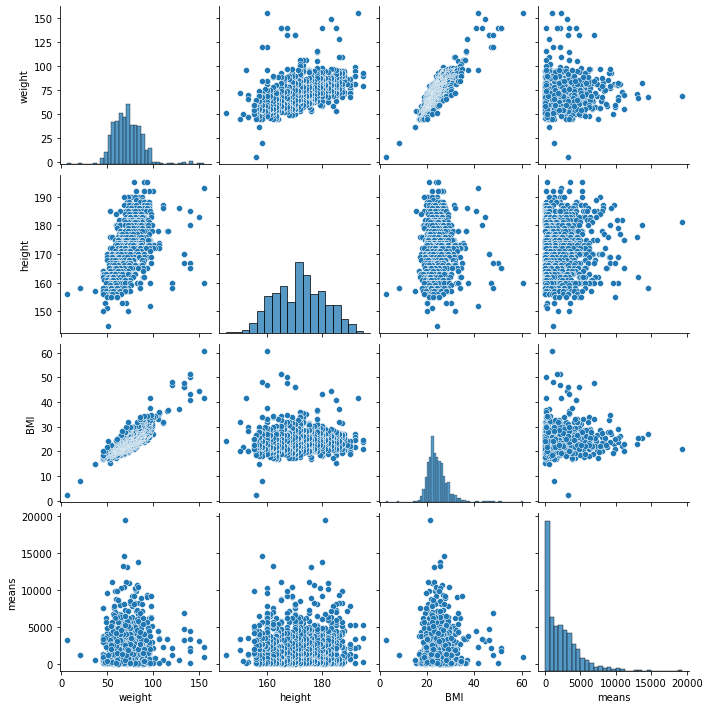

In [161]:
df4=df[["weight", "height", "BMI", "means"]]
sns.pairplot(df4)
plt.show() 

In [ ]:
12. comparing BMI with steps

Text(0.5, 1.0, 'BMI of fitbit users per steps')

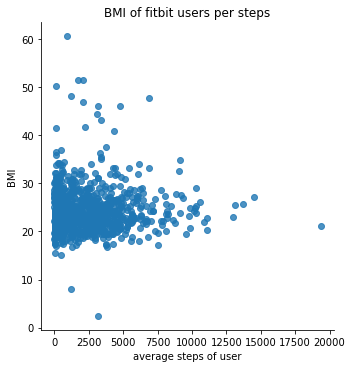

In [162]:
sns.lmplot(x='means', y='BMI', fit_reg=False, data=df4)
plt.xlabel('average steps of user') 
plt.ylabel('BMI')
plt.title('BMI of fitbit users per steps')

12. round BMI to 2 

In [163]:
df4.dropna()
df4.round(2)

,weight,height,BMI,means
211,79.0,195.0,20.78,279.74
38,90.0,195.0,23.67,3472.40
915,93.0,195.0,24.46,5255.42
547,155.0,193.0,41.61,2212.22
318,99.0,192.0,26.86,2139.86
...,...,...,...,...
328,96.0,152.0,41.55,121.99
872,50.0,151.0,21.93,332.74
904,72.0,150.0,32.00,1823.10
66,45.0,150.0,20.00,3385.04


13. Correlation

In [164]:
from scipy.stats.stats import pearsonr
print(pearsonr(df4['means'],df4['BMI']))
print(pearsonr(df4['means'],df4['BMI']))
corr = df4[['weight', 'means', 'BMI']].corr() 
corr

(0.01083547259048508, 0.7420709721518272)
(0.01083547259048508, 0.7420709721518272)


,weight,means,BMI
weight,1.000000,0.028891,0.871410
means,0.028891,1.000000,0.010835
BMI,0.871410,0.010835,1.000000


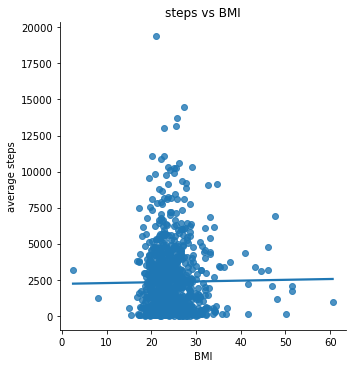

In [165]:
sns.lmplot(x='BMI', y='means', data=df4, ci=False)
plt.title('steps vs BMI')
plt.xlabel('BMI')
plt.ylabel('average steps')
plt.show()

there is no significant linear relationship between these data

14. regression line

In [173]:
from sklearn.linear_model import LinearRegression 
x = df4[['BMI']] 
y = df4['means']
lm = LinearRegression() 
lm.fit(x, y) 

b0 = lm.intercept_ 
b1 = lm.coef_[0] 

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X") 

The regression line is equal to y = 2216.413 + 5.593X


15. predict the values for all  in our dataset:

In [174]:
df4['means_p'] = lm.predict(x) 
df4.head(10)

C:\Users\souri\AppData\Local\Temp\ipykernel_6832\1952535877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['means_p'] = lm.predict(x)


,weight,height,BMI,means,means_p
211,79.0,195.0,20.775805,279.744681,2332.606311
38,90.0,195.0,23.668639,3472.395137,2348.785068
915,93.0,195.0,24.457594,5255.422492,2353.197456
547,155.0,193.0,41.611855,2212.218845,2449.136128
318,99.0,192.0,26.855469,2139.860182,2366.608056
575,81.0,192.0,21.972656,5264.957447,2339.299942
730,95.0,192.0,25.770399,1050.620061,2360.539586
262,90.0,192.0,24.414062,3378.711246,2352.953999
921,90.0,192.0,24.414062,82.483283,2352.953999
648,80.0,190.0,22.160665,2372.775076,2340.351417


there is a wide difference between the prediction and the values. this is mainly because of low correlation between our data.

In [175]:
df4['resid'] = df4['means'] - df4['means_p'] 

C:\Users\souri\AppData\Local\Temp\ipykernel_6832\3304890432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['resid'] = df4['means'] - df4['means_p']


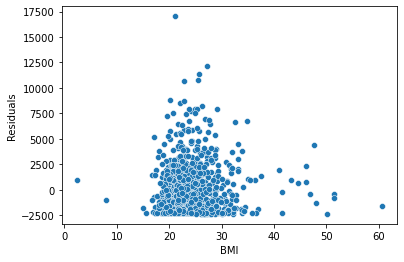

In [176]:
sns.scatterplot(x='BMI',y='resid',data=df4)
plt.xlabel('BMI')
plt.ylabel('Residuals')
plt.show()

the errors get more negative for higher BMI

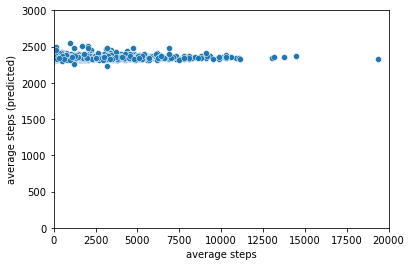

In [192]:
sns.scatterplot(x='means',y='means_p',data=df4)
plt.xlim(0, 20000) 
plt.ylim(0, 3000) 
plt.xlabel('average steps')
plt.ylabel('average steps (predicted)')
plt.show()

In [183]:
from sklearn.metrics import r2_score
r2_score(df4['means'], df4['means_p'])

0.00011740746625921172

The R^2 is 0.0012, which means 0.12 % of the variation in steps is explained by the model. That's NOT good!

In [193]:
math.sqrt(mean_squared_error(df4['means'], df4['means_p']))

2423.7831265653117

The RMSE is 2423.78. Which means that we are typically about 2423.78 off in our predicted steps.